In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as opt

importo i dati del Random walk discreto
Distanza media percorsa dal random walk al variare del numero di passi $i \in [0,10^2]$

In [2]:
file=open('discrete_RW.csv')
#print(file.read())
rw_discreto=[]
err_discreto=[]
for line in file:
    rw_discreto.append(float(line.split(',')[0]))
    err_discreto.append(float(line.split(',')[1]))
file.close()
rw_discreto=np.array(rw_discreto)
err_discreto=np.array(err_discreto)

N_passi=len(rw_discreto)
passi=np.linspace(1,N_passi, N_passi)
print(err_discreto)

[0.         0.00406714 0.00640831 0.00598411 0.00727719 0.00897105
 0.0105725  0.0092068  0.0101484  0.012206   0.0149354  0.0130845
 0.0129352  0.0167198  0.015807   0.0163893  0.0156734  0.0175164
 0.0169432  0.0177247  0.0193912  0.0192258  0.0191107  0.0193115
 0.0186504  0.0215807  0.0189237  0.021179   0.0229278  0.0215001
 0.025642   0.0216665  0.0242306  0.0221991  0.0254571  0.0275267
 0.0240575  0.0271554  0.024801   0.0255401  0.0302885  0.0265514
 0.0286104  0.0297145  0.0270863  0.0261849  0.0272756  0.0261818
 0.0316543  0.0246038  0.0286625  0.0271254  0.0268352  0.0286088
 0.0266737  0.0259429  0.0299026  0.0301398  0.0328689  0.0319269
 0.0294068  0.0283749  0.0363109  0.0373704  0.0296255  0.0322672
 0.033711   0.0348737  0.0322699  0.0305528  0.0332356  0.037689
 0.0346797  0.0342355  0.0379656  0.0355432  0.0405117  0.0357815
 0.0338835  0.0389434  0.0343585  0.0368153  0.0362891  0.039812
 0.0351694  0.0272301  0.0354316  0.0390627  0.0388315  0.037965
 0.0377928  

Definisco la funziona con cui fittare i dati
Verifico se il random walk segue un amndamento dispersivo cioè se $d_m \propto \sqrt{(N)}$ dove $d_m$ è la distanza media percorsa (in modulo)

In [3]:
def fit(N,k):
    return k*np.sqrt(N)

optimizedParameters1, pcov = opt.curve_fit(fit, passi, rw_discreto);
print(optimizedParameters1)

[0.9991811]


Grafico i dati con relativi errori e fit

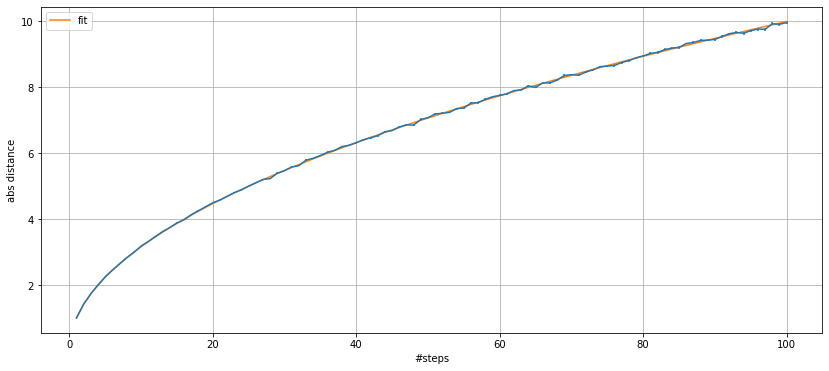

In [4]:
plt.figure(figsize=(14,6))
plt.errorbar(passi,rw_discreto,yerr=err_discreto)
plt.plot(passi, fit(passi, *optimizedParameters1), label="fit")
plt.xlabel('#steps')
plt.ylabel('abs distance')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
file=open('continum_RW.csv')
#print(file.read())
rw_continuo=[]
err=[]
for line in file:
    rw_continuo.append(float(line.split(',')[0]))
    err.append(float(line.split(',')[1]))
file.close()
rw_continuo=np.array(rw_continuo)
err=np.array(err)

N_passi=len(rw_continuo)
passi=np.linspace(1,N_passi, N_passi)

In [6]:
optimizedParameters, pcov = opt.curve_fit(fit, passi, rw_continuo);
print(optimizedParameters)

[1.00033369]


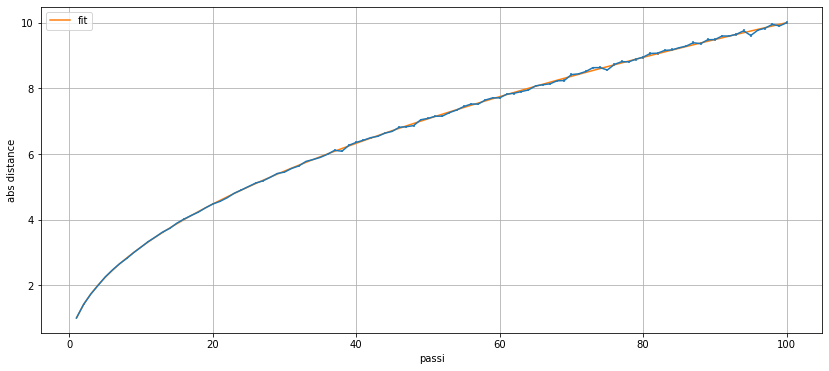

In [7]:
plt.figure(figsize=(14,6))
plt.errorbar(passi,rw_continuo,yerr=err)
plt.plot(passi, fit(passi, *optimizedParameters), label="fit")
plt.xlabel('passi')
plt.ylabel('abs distance')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
M=10000
x=np.linspace(0,100,M)
x2=x**2
print(x2[2:7])


[0.00040008 0.00090018 0.00160032 0.0025005  0.00360072]


In [9]:
np.sqrt(np.mean(x2)-np.mean(x)**2)

28.870400355179246

In [10]:
N_block=100
L=int(M/N_block)
print(L)
xb=np.zeros(N_block)
x2b=np.zeros(N_block)
for i in range(N_block):
    xb[i]=np.mean(x[i*L:L*(i+1)])
    x2b[i]=np.mean(x2[i*L:L*(i+1)])


100
